In [2]:
import numpy as np
from datetime import datetime

# Arrays

## Lesson Objectives
By the end of this lesson, you will be able to:
- Construct an array using the numpy module
- Index, slice, and iterate through an array
- Reshape arrays
- Perform array math, including broadcasting

## Table of Contents
 - [Numpy](#numpy)
 - [Arrays](#arrays)
 - [Indexing, Slicing and Iterating](#indexing)
 - [Shape Manipulation](#shape)
 - [Array Math](#math)
 - [Broadcasting](#broadcast)
 - [Applications](#applications)

<a id='numpy'></a>
## NumPy
NumPy is the fundamental package for scientific computing with Python. It contains among other things:

 - a powerful N-dimensional array object
 - sophisticated (broadcasting) functions
 - tools for integrating C/C++ and Fortran code
 - useful linear algebra, Fourier transform, and random number capabilities

NumPy also allows you to define arbitrary data types. This allows for quick integration with a wide variety of databases.

<a id='arrays'></a>
## Arrays
A NumPy array is an *N*-dimensional list of values, all of the same type, that is indexed by a `tuple` of positive integers. 

When talking about an array, there's some terminology you need to be familiar with:
 - The number of dimensions, called **axes** in numpy lingo, is the **rank** of the array.
 - The **shape** of an array is the tuple of integers giving the **length** of the array along each axis.

For example, take the coordinates of a point in 3D space:  `[1, 2, 1]`

 - This is an array of **rank** 1, because it has one axis. 
 - That axis has a **length** of 3, because there are three elements in it. 
 - Thus the **shape** of the array is (3,)

### Array Creation
There are several ways to create an array.

The most intuitive is to create one from a `list` or `tuple` using the numpy `array` function. When you do this, the type of the resulting array is deduced from the type of the elements in the container you passed.

In [93]:
l = [[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]]

a = np.array(l)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [94]:
a.dtype #see what type numpy decided to go with

dtype('int64')

Note that you cannot create an array with multiple numeric arguments. They need to be in a container of some sort!

In [4]:
a = np.array(1,2,3,4)    # WRONG
a = np.array([1,2,3,4])  # RIGHT

ValueError: only 2 non-keyword arguments accepted

### NumPy Array-Creating Functions

> **`arange`**

> returns evenly spaced values within a given interval.

In [ ]:
a = np.arange(15).reshape(3, 5)
a

In some cases, you want to create an array although you don't yet know what's going to go into it. So long as you know the size, you can use one of several NumPy functions to create arrays with initial placeholder content. These minimize the necessity of growing arrays, which is an expensive operation.

> **`zeros`** 

> creates an array full of zeros.

In [ ]:
np.zeros((3,5))

> **`ones`**

> creates an array full of ones.

In [ ]:
np.ones( (2,3,4), dtype=np.int16 ) #you can specify the dtype when creating the array

> **`empty`**

> creates an array whose initial content is random and depends on the state of the memory. By default, the dtype of the created array is float64.

In [99]:
np.empty( (2,3) )   # output may vary

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

> **`arange`**

> To create sequences of numbers, NumPy provides a function analogous to `range` that returns arrays instead of lists.

In [ ]:
np.arange( 0, 100, 10 ) # it accepts int

In [ ]:
np.arange( 0, 10, 0.5 ) # or float arguments

> **`linspace`**

> When `arange` is used with floats, [finite floating point precision](https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html) means that it's generally not possible to predict the number of elements that will be returned. This means that it's generally better to use the function `linspace`, which receives as an argument the number of elements we want instead of the step:

In [ ]:
np.linspace( 0, 2, 10 )                 # 9 numbers from 0 to 2

### Array Instance Methods
Like other objects, there are some useful instance methods you can use to inspect it

**`ndarray.ndim`**
> the number of axes (dimensions) of the array. The number of dimensions is referred to as rank.

In [ ]:
a.ndim

**`ndarray.shape`**
> the dimensions of the array. This is a tuple of integers indicating the size of the array in each dimension. For a matrix with `n` rows and `m` columns, shape will be `(n,m)`. The length of the shape tuple is therefore the rank, or number of dimensions, `ndim`.

In [ ]:
a.shape

**`ndarray.size`**
> the total number of elements of the array. This is equal to the product of the elements of `shape`.

In [ ]:
a.size

**`ndarray.dtype`**
> an object describing the type of the elements in the array. One can create or specify dtype’s using standard Python types. Additionally NumPy provides types of its own. numpy.int32, numpy.int16, and numpy.float64 are some examples.

In [ ]:
a.dtype

**`ndarray.itemsize`**
> the size in bytes of each element of the array. For example, an array of elements of type float64 has itemsize 8 (=64/8), while one of type complex32 has itemsize 4 (=32/8). It is equivalent to ndarray.dtype.itemsize.

In [ ]:
a.itemsize

**`ndarray.data`**
> the buffer containing the actual elements of the array. Normally, we won’t need to use this attribute because we will access the elements in an array using indexing facilities.

In [ ]:
a.data

### Excercises

<a id='indexing'></a>
## Indexing, Slicing and Iterating

One-dimensional arrays can be indexed, sliced and iterated over, much like lists and other Python sequences.

In [118]:
a = np.arange(0,100,10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [119]:
a[2]

20

In [120]:
a[2:5]

array([20, 30, 40])

In [121]:
a[:6:2] = 999    # from start to position 6, exclusive, set every 2nd element to 999
a

array([999,  10, 999,  30, 999,  50,  60,  70,  80,  90])

In [122]:
a[ : :-1]          # reverse a

array([ 90,  80,  70,  60,  50, 999,  30, 999,  10, 999])

In [123]:
for i in a:
    print(i**(1/2.))

31.6069612586
3.16227766017
31.6069612586
5.47722557505
31.6069612586
7.07106781187
7.74596669241
8.36660026534
8.94427191
9.48683298051


Multidimensional arrays can have one index per axis. These indices are given in a tuple separated by commas:

In [128]:
b = np.arange(0,9).reshape(3,3) #incidentally, you can construct an array by executing a function over each coordinate

In [129]:
b

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Here's an illustration for indexing a 2D array.

<img src = 'assets/index_2d_array.png' height = 450 width = 450>

In [131]:
b[0,2]

2

In [132]:
b[0:3, 1]                       # each row in the second column of b

array([1, 4, 7])

In [133]:
b[ : ,1]                        # equivalent to the previous example

array([1, 4, 7])

In [134]:
b[1:3, : ]                      # each column in the second and third row of b

array([[3, 4, 5],
       [6, 7, 8]])

When fewer indices are provided than the number of axes, the missing indices are considered complete slices:

In [135]:
b[-1]                           # the last row. Equivalent to b[-1,:]

array([6, 7, 8])

The expression within brackets in `b[i]` is treated as an `i` followed by as many instances of `:` as needed to represent the remaining axes. NumPy also allows you to write this using dots as `b[i,...]`.

The dots (`...`) represent as many colons as needed to produce a complete indexing tuple. For example, if `x` is a rank 5 array (i.e., it has 5 axes), then:
 - `x[1,2,...]` is equivalent to `x[1,2,:,:,:]`
 - `x[...,3]` is equivalent to `x[:,:,:,:,3]`
 - `x[4,...,5,:]` is equivalent to `x[4,:,:,5,:]`

In [138]:
c = np.array( [[[  0,  1,  2],               # a 3D array (two stacked 2D arrays)
                [ 10, 12, 13]],
               [[100,101,102],
               [110,112,113]]])

c

array([[[  0,   1,   2],
        [ 10,  12,  13]],

       [[100, 101, 102],
        [110, 112, 113]]])

In [137]:
c.shape

(2, 2, 3)

In [ ]:
c[1,...]                                     # the same as c[1,:,:] or c[1]

In [ ]:
c[...,2]                                     # the same as c[:,:,2]               

Iterating over multidimensional arrays is done with respect to the first axis:

In [140]:
for row in c:
    print(row)

[[ 0  1  2]
 [10 12 13]]
[[100 101 102]
 [110 112 113]]


However, if one wants to perform an operation on each element in the array, one can use the `flat` attribute, which is an iterator over all the elements of the array:

In [141]:
for e in c.flat:
    print(e)

0
1
2
10
12
13
100
101
102
110
112
113


### Fancy Indexing:  Indexing with Arrays of Indices
It's NumPy and not me that calls this "fancy" indexing. Honest...

So, in addition to indexing by integers and slices, NumPy arrays can also be indexed by arrays of integers.

In [ ]:
a = np.arange(10)**2                       # the first 10 square numbers
i = np.array( [ 1,1,4,9,5 ] )              # an array of indices
a[i]                                       # the elements of a at the positions i

In [ ]:
j = np.array( [ [ 3, 4], [ 9, 7 ] ] )      # a bi-dimensional array of indices
a[j]                                       # the same shape as j

When the indexed array `a` is multidimensional, a single array of indices refers to the first dimension of `a`:

In [ ]:
a = np.arange(15).reshape(5, 3)
a

In [ ]:
slicer = np.array( [ [ 0, 1, 2, 0 ],
                    [ 0, 3, 4, 0 ]  ] )
a[slicer]

You can also give indexes for more than one dimension. But the arrays of indices for each dimension must have the same shape.

In [ ]:
a = np.arange(12).reshape(3,4)
a

In [ ]:
i = np.array( [ [0,1],                        # the indices for the first dimension of a
                [1,2] ] )

j = np.array( [ [2,1],                        # the indices for the second dimension
                [3,3] ] )

a[i,j]                                        # remember, i and j must have equal shape!

We could also have put `i` and `j` into a list and then sliced with that list:

In [ ]:
l = [i,j]
a[l]

But we cannot put `i` and `j` into an array and then slice. That's because the array will be interpreted as indexing the first dimension of `a`.

In [ ]:
s = np.array( [i,j] )
a[s]  

### Indexing with Boolean Arrays
When we indexed an array with arrays of (integer) indices, we were providing the list of indices to pick. 

With boolean indices, we explicitly choose which items in the array we want and which ones we don’t using a boolean expression.

This is straightforward when the boolean array has the same shape as the original array:

In [100]:
a = np.arange(12).reshape(3,4)
b = a > 3                                  # using a boolean operator will return bool types
b                                          # b is an array of bools with a's shape

array([[False, False, False, False],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]], dtype=bool)

And now that we have an array of bools `b` equal in shape to `a`, we can return a 1D array with the selected elements:

In [101]:
a[b]                                       

array([ 4,  5,  6,  7,  8,  9, 10, 11])

This trick can be useful when you want to make new assignments to an array:

In [102]:
a[b] = 999
a

array([[  0,   1,   2,   3],
       [999, 999, 999, 999],
       [999, 999, 999, 999]])

You can also supply a 1D boolean array for each dimension of the array you want to slice.

In [103]:
a = np.arange(12).reshape(3,4)
b1 = np.array([True,False,True])             # boolean array for first dimension of a
b2 = np.array([True,False,True,False])       # boolean array for second dimension of a
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [104]:
a[b1]                                        # selecting rows

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11]])

In [105]:
a[:,b2]                                      # selecting columns

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

<a id='shape'></a>
## Shape Manipulation
We've seen that an array has a shape given by the number of elements along each axis. We can changing the shape of an array in a variet of ways without altering the original array.

In [110]:
a = np.floor(10*np.random.random((4,5))) #another way to create an array, returning the floor of the input, elementwise
a

array([[ 1.,  6.,  5.,  6.,  8.],
       [ 3.,  7.,  5.,  5.,  3.],
       [ 6.,  1.,  4.,  6.,  3.],
       [ 9.,  2.,  5.,  8.,  7.]])

In [ ]:
a.shape

In [ ]:
a.ravel()  # returns a copy of the array, flattened

In [ ]:
a.reshape(10,2)  # returns a copy of the array with a modified shape

If a dimension is given as -1 in a reshaping operation, the other dimensions are automatically calculated:

In [ ]:
a.reshape(20,-1)

In [ ]:
a.T  # returns a transposed copy of the array

The above methods return copies of the array. You can use the `resize` method to modify the array itself:

In [ ]:
a

In [ ]:
a.resize(10,2)
a

<a id='math'></a>
## Array Math
Arrays enable you to execute batch operations on data without writing a `for` loop, like you'd have to do for a list.

The simplest operation would be adding a *scalar* (an individual quantity) to an array. In this case, the scalar's value is added to each element of the array.

In [ ]:
x = np.array([[1,2],[3,4]])
x + 1

This process is  called **vectorization**. It's the chief source of NumPy's efficiency gains over the built-in Python `list`. 

> *`Note that, so long as your arrays are of equal size, a vectorized operation will be applied elementwise. If the arrays are of different sizes, a process known as **broadcasting** is used (we'll see that later).`*

For now, let's make two arrays of equal size and apply some basic operations. As usual, there's more than one way to skin a cat here.

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

> Addition

In [ ]:
x + y

In [ ]:
np.add(x, y)

> Subtraction

In [ ]:
x - y

In [ ]:
np.subtract(x, y)

> Multiplication

In [ ]:
x * y

In [ ]:
np.multiply(x, y)

> Division

In [ ]:
x / y

In [ ]:
np.divide(x, y)

> Square Root

In [ ]:
np.sqrt(x)

There are a lot of mathematical functions you can use with NumPy arrays. See the [documentation](https://docs.scipy.org/doc/numpy/reference/routines.math.html) to learn more.

<a id='broadcast'></a>
## Broadcasting
Broadcasting allows numpy to work with arrays of different shapes when performing arithmetic operations. This can make code more concise and faster. We use the term "broadcasting" because the smaller array is “broadcast” across the larger array so that they have compatible shapes. 

We'll visualize how broadcasting works below. But first, let's consider the use-case and how'd we achieve it using a `for` loop.

Suppose that we wanted to add a constant vector `v` to each row of a matrix `m`. It's implied that `v` and `m` have different shapes. We could perform the operation with a loop like this:

In [142]:
m = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])  #create the matrix
v = np.array([1, 0, 1])                                  #create the vector
y = np.empty_like(m)                                     #Create an empty matrix with the same shape as m

# Use a loop to add v to each row of m 
for i in range(4):
    y[i, :] = m[i, :] + v

y

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

Although a loop works, you'll notice a drag on performance when the matrix `m` is very large. That's because adding the vector `v` to each row of the matrix `m` is equivalent to forming a matrix of vertically stacked copies of `v` (`vv`) and *then* performing elementwise summation of `m` and `vv`.

Broadcasting can perform this computation without actually creating stacked copies of `v`. What's more, by vectorizing your array operations, looping occurs in C instead of Python. This makes everything much faster!

In [84]:
y = m + v # Add v to each row of m. Because of broadcasting, it doesnt matter that the shapes aren't the same.
y

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

Thanks to broadcasting, `y = m + v` works even though `m` has shape (4, 3) and v has shape (3,). The trick is that, behind the scenes, NumPy treated `v` as if its shape were (4, 3). 

To get a better idea of this consider the following 3 examples. Each broadcasting operation is followed by an image that shows the elements of each array in bold-bordered cells. To visualize the broadcasting, I've added lightly-shaded cells.

In [87]:
np.arange(3) + 1

array([1, 2, 3])

<img src='assets/broadcast1.png' height = 650 width = 650>

In [88]:
np.ones((3,3)) + np.arange(3)

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

<img src='assets/broadcast2.png' height = 650 width = 650>

In [91]:
np.arange(3).reshape((3,1)) + np.arange(3)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

<img src='assets/broadcast3.png' height = 650 width = 650>

To read more about broadcasting, check out the [documentation](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html).

<a id='applications'></a>
## Applications

### Need for Speed:  When to use a NumPy array over a Python list.
In Python, lists are an efficient general-purpose container. `list` methods and operations - e.g. popping, appending, and concatenation - work fairly well. Plus they're easy to construct and manipulate using `for` loops or list comprehensions. 

Even so, lists have a few limitations:
 - First, they don’t support “vectorized” operations like elementwise addition and multiplication. 
 - Second, since lists can contain objects of differnt types, Python has to store `type` information for every single element and then execute [type dispatching](https://en.wikipedia.org/wiki/Dynamic_dispatch) whenever an operation is performd on an element within a list. This can consume a lot of memory.

Since a NumPy array contains uniform values, you sacrifice flexibility for performance. When is this trade-off worth it? Whenever you can replace list loops/comprehensions with a vectorized operation.

To see this in action, we'll do some vectorized addition on two lists of lists and then again with arrays.

In [79]:
def calculate_time(expression):
    nitems = 1000000
    narray = np.arange(nitems)
    larray = range(nitems)
    start = datetime.now()
    val = eval(expression)
    end = datetime.now()
    return "%d micro seconds  %s" %((end-start).microseconds,expression)

In [80]:
numpy_sum = "narray.sum()"

list_sum = "sum(larray)"

print("Numpy:  {}".format(calculate_time(numpy_sum)))

print("Lists:  {}".format(calculate_time(list_sum)))

Numpy:  1133 micro seconds  narray.sum()
Lists:  29994 micro seconds  sum(larray)


Although the above is a simple example, performance differences can grow quite steeply when you choose to work with a multidimensional array instead of a list of lists.

### Manipulating Color Pallete Arrays
In this example, we'll see how you can use NumPy arrays to manipulate an image.

First, let's import a plotting library:

In [81]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline #This turns on "inline" plotting, which will make plots appear in the notebook

In [8]:
img = mpimg.imread('assets/moon.png')

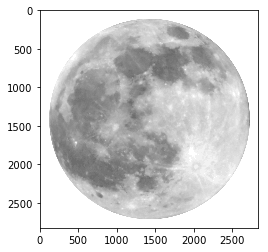

In [9]:
plt.imshow(img)

Behind the scenes, this image is a NumPy array! Let's look at its shape and see how the matches some of the image info.

In [13]:
img.shape

(2824, 2832, 4)

Here's some detail on the image from my command line:

<img src = 'assets/image_info.png' height = 250 width = 250>

Note how the shape corresponds to the pixel height, pixel width and samples per pixel.

In [16]:
img.dtype

dtype('float32')

Also note the `dtype`:  `float32`. Matplotlib has rescaled the 8 bit data from each sample to floating point numbers between 0.0 and 1.0.

In our image array, each inner array represents a pixel: 2832 x 2824 = 7997568 pixels. 

Each of these pixels then has 4 values tied to it. The first 3 are RGB (red, green, blue) values. Since our image is an RGB*A*, the fourth value is the A, which stands for the alpha/opacity channel. If a pixel has a value of 0 in its alpha channel, it is fully transparent (and, thus, invisible), whereas a value of 1 in the alpha channel gives a fully opaque pixel (traditional digital images).

Let's look at an individual pixel to get an idea of what we're working with. Let's choose the pixel at width 1500 and height 1500.

In [51]:
img[1500,1500,...]

array([ 0.74117649,  0.74117649,  0.74117649,  1.        ], dtype=float32)

Above, you can see:
    - Red = 0.74117649
    - Green = 0.74117649
    - Blue = 0.74117649
    - Alpha = 1
    
Now that we understand our array's organization, let's applying some pseudocolor.

Pseudocolor is a tool for enhancing contrast in single-channel, grayscale, luminosity images. Since R, G, and B are all similar (as we saw above), we can just pick one channel of our data:

In [73]:
pseudo = img[:,:,1] 

Now, with that we have 2D (no color) image, the default matplotlib colormap will be applied. The default is called viridis. It's greenish:

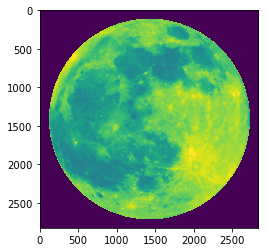

In [74]:
plt.imshow(pseudo) 

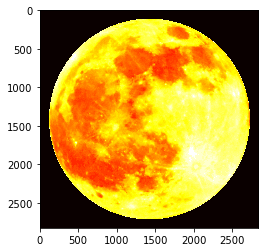

In [75]:
plt.imshow(pseudo, cmap="hot")

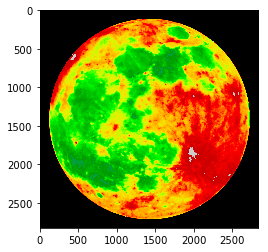

In [78]:
plt.imshow(pseudo, cmap="nipy_spectral")